## Neural Network from Scratch on MNIST data

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
x_train = np.load('./data/X_train.npy')
x_train = x_train.flatten().reshape(-1,28*28)
x_train = x_train / 255.0
gt_indices = np.load('./data/y_train.npy')
train_length = len(x_train)
print("Number of training examples: {:d}".format(train_length))

Number of training examples: 60000


In [9]:
'''Dimensions to be used for creating model'''

batch_size = 64  # batch size
input_dim = 784  # input dimension
hidden_1_dim = 512  # hidden layer 1 dimension
hidden_2_dim = 256  # hidden layer 2 dimension
output_dim = 10   # output dimension

'''Other hyperparameters'''
learning_rate = 1e-5

In [10]:
#creating one hot vector representation of output classification
y_train = np.zeros((train_length, output_dim))

for i in range(train_length):
    y_train[i,gt_indices[i]] = 1

# Number of mini-batches (as integer) in one epoch
num_minibatches = np.floor(train_length/batch_size).astype(int) 

In [11]:
print("No of mini-batches {:d} and total training data used in training:\
{}.".format(num_minibatches, num_minibatches*batch_size))

No of mini-batches 937 and total training data used in training:59968.


In [12]:
'''Randomly Initialize Weights  from standard normal distribution (i.e., mean = 0 and s.d. = 1.0).
Use the dimesnions specified in the cell 3 to initialize your weights matrices. 
Use the nomenclature W1,W2 etc. (provided below) for the different weight matrices.'''

W1 = np.random.randn(input_dim,hidden_1_dim)
W2 = np.random.randn(hidden_1_dim,hidden_2_dim)
W3 = np.random.randn(hidden_2_dim,output_dim)

In [13]:

def softmax(x):
    
    return np.exp(x)/(np.sum(np.exp(x), axis = 1)[:, np.newaxis])

In [14]:
def Relu(x):
    return np.maximum(x,0)

 Epoch: 0, iteration: 0, Loss: 2.8133 
 Epoch: 1, iteration: 937, Loss: 2.6467 
 Epoch: 2, iteration: 1874, Loss: 2.4655 
 Epoch: 3, iteration: 2811, Loss: 2.2809 
 Epoch: 4, iteration: 3748, Loss: 2.1070 
 Epoch: 5, iteration: 4685, Loss: 1.9539 
 Epoch: 6, iteration: 5622, Loss: 1.8243 
 Epoch: 7, iteration: 6559, Loss: 1.7158 
 Epoch: 8, iteration: 7496, Loss: 1.6264 
 Epoch: 9, iteration: 8433, Loss: 1.5520 
 Epoch: 10, iteration: 9370, Loss: 1.5452 
 Epoch: 11, iteration: 10307, Loss: 1.5386 
 Epoch: 12, iteration: 11244, Loss: 1.5322 
 Epoch: 13, iteration: 12181, Loss: 1.5258 
 Epoch: 14, iteration: 13118, Loss: 1.5196 
 Epoch: 15, iteration: 14055, Loss: 1.5135 
 Epoch: 16, iteration: 14992, Loss: 1.5075 
 Epoch: 17, iteration: 15929, Loss: 1.5016 
 Epoch: 18, iteration: 16866, Loss: 1.4958 
 Epoch: 19, iteration: 17803, Loss: 1.4900 
 Epoch: 20, iteration: 18740, Loss: 1.4894 
 Epoch: 21, iteration: 19677, Loss: 1.4889 


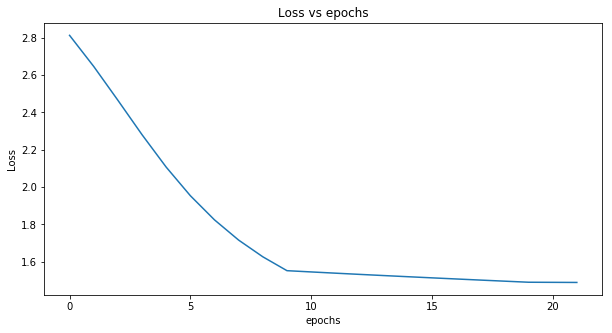

In [15]:
no_of_iterations = 20000
loss_list=[]
i_epoch = 0
for i_iter in range(no_of_iterations):
    
    ''''''
    batch_elem_idx = i_iter%num_minibatches
    x_batchinput = x_train[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size]
    
    ######################### Forward Pass Block #####################################
    '''Write the code for forward block of the neural network with 2 hidden layers.
    Please stick to the notation below which follows the notation provided in the lecture slides.
    Note that you are allowed to write the right hand sides of these variables in more than
    one line if that is convenient for you.'''
    
    # first hidden layer implementation
    a1 = np.matmul(x_batchinput,W1)
    a1= (a1 - np.mean(a1))/((np.var(a1) + 0.00000001)**(0.5))
    # implement Relu layer
    h1 =  Relu(a1)
    
    #  implement 2 hidden layer
    a2 = np.dot(h1,W2)
    a2= (a2 - np.mean(a2))/((np.var(a2) + 0.00000001)**(0.5))
    # implement Relu activation 
    h2 = Relu(a2)
    #implement linear output layer
    a3 = np.dot(h2,W3)
    a3= (a3 - np.mean(a3))/((np.var(a3) + 0.00000001)**(0.5))
    # softmax layer
    softmax_score = softmax(a3) #enusre you have implemented the softmax function defined above
    ##################################################################################
    ###############################################################################################

    neg_log_softmax_score = -np.log(softmax_score+0.00000001) # The small number is added to avoid 0 input to log function
    
    # Compute and print loss
    if i_iter%num_minibatches == 0:
        loss = np.mean(np.diag(np.take(neg_log_softmax_score, gt_indices[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size],\
                                       axis=1)))
        print(" Epoch: {:d}, iteration: {:d}, Loss: {:6.4f} ".format(i_epoch, i_iter, loss))
        loss_list.append(loss)
        i_epoch += 1
        # Each 10th epoch reduce learning rate by a factor of 10
        if i_epoch%10 == 0:
            learning_rate /= 10.0
     
    ################################### Backpropagation Code Block #####################################
    ''' Use the convention grad_{} for computing the gradients.
    for e.g 
        grad_W1 for gradients w.r.t. weight W1
        grad_w2 for gradients w.r.t. weights W2'''
    # Gradient of cross-entropy loss w.r.t. preactivation of the output layer
    grad_softmax_score = -(y_train[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size]-softmax_score)
    
    # gradient w.r.t W3
    grad_W3 = np.dot(np.transpose(h2),grad_softmax_score)/batch_size
    # gradient w.r.t h2
    grad_h2 = np.matmul(grad_softmax_score,W3.T)
    # gradient w.r.t a2
    grad_a2 = (grad_h2 *np.where(a2>0,1.0,0))
    # gradient w.r.t W2
    grad_W2 = np.dot(np.transpose(h1),grad_a2)/batch_size
    # gradient w.r.t h1
    grad_h1 = np.matmul(grad_a2,W2.T)
    # gradient w.r.t a1
    grad_a1 = (grad_h1*np.where(a1>0,1.0,0))
    # gradient w.r.t W1
    grad_W1 = np.dot(x_batchinput.T,grad_a1)/batch_size
    ###############################################################################################
    
    
    ################################ Update Weights Block using SGD ####################################
    W3 -= learning_rate * grad_W3
    W2 -= learning_rate * grad_W2
    W1 -= learning_rate * grad_W1
    ####################################################################################################
    
#plotting the loss
plt.figure(figsize=(10,5))
plt.plot(loss_list)
plt.title('Loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [18]:
'''Loading the test data from data/X_test.npy and data/y_test.npy.'''
x_test = np.load('./data/X_test.npy')
x_test = x_test.flatten().reshape(-1,28*28)
x_test = x_test / 255.0
y_test = np.load('./data/y_test.npy')

In [21]:
batch_size_test = 100 # Deliberately taken 100 so that it divides the test data size
num_minibatches = len(y_test)/batch_size_test
test_correct = 0

'''Only forward block code and compute softmax_score .'''
for i_iter in range(int(num_minibatches)):
    
    '''Get one minibatch'''
    batch_elem_idx = i_iter%num_minibatches
    x_batchinput = x_test[i_iter*batch_size_test:(i_iter+1)*batch_size_test]
    
    # first hidden layer implementation
    a1 = np.dot(x_batchinput,W1)
    # implement Relu layer
    h1 = Relu(a1)
    #  implement 2 hidden layer
    a2 = np.matmul(h1,W2)
    # implement Relu activation 
    h2 = Relu(a2)
    #implement linear output layer
    a3 = np.matmul(h2,W3)
    # softmax layer
    softmax_score = softmax(a3) 
    ##################################################################################
    
    y_batchinput = y_test[i_iter*batch_size_test:(i_iter+1)*batch_size_test]
    
    y_pred = np.argmax(softmax_score, axis=1)
    num_correct_i_iter = np.sum(y_pred == y_batchinput)
    test_correct += num_correct_i_iter
print ("Test accuracy is {:4.2f} %".format(test_correct/len(y_test)*100))

Test accuracy is 27.35 %
